In [ ]:
### Analiza - minim 10 fraze
# Fisier txt - fraze despre criptomonede

In [1]:
# Importarea bibliotecilor necesare
import nltk # Natural Language Toolkit - analiza si procesarea textului
from nltk.corpus import stopwords # stopwords ofera o lista de cuvinte comune de sfarsit
from nltk.tokenize import word_tokenize # word_tokenize este folosit pt a imparti textul in cuvinte si tokens
from nltk.probability import FreqDist # FreqDist - distributii de frecventa a cuvintelor
from nltk.sentiment import SentimentIntensityAnalyzer # analiza de sentiment asupra textului - ofera un scor al sentimentului - pozitiv, negativ sau neutru
import pandas as pd # manipularea si procesarea datelor
import matplotlib.pyplot as plt # vizualizarea datelor - crearea de grafice (bar chart, line etc)
from collections import Counter # numararea cuvintelor frecvente
import re # procesarea si extragerea textului

In [19]:

fraze=pd.read_table(r"C:\Materiale facultate\MASTER CEC\Data Mining\fraze.txt", delimiter="\t", header=None, names=["sentences"])
fraze

,sentences
0,Cryptocurrencies have taken the world by storm...
1,"These digital assets have become a hot topic, ..."
2,"In this article, we will delve into the fascin..."
3,The cryptocurrency revolution began with the c...
4,Bitcoin introduced the concept of a decentrali...
5,This technology allows for secure and transpar...
6,At the heart of cryptocurrencies is blockchain...
7,A blockchain is a distributed ledger that reco...
8,"These transactions are grouped into ""blocks"" a..."
9,This decentralized and tamper-resistant ledger...


In [5]:
pip install spacy

     ---------------------------------------- 12.1/12.1 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 481.9/481.9 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 381.9/381.9 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 45.0/45.0 kB 552.1 kB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_ext

In [26]:
# Etapa de preprocesare a textului

# Tokenizare, Lemmatizare, Eliminare stopwords, a semnelor de punctuatie si a numerelor
import spacy
import nltk
import pandas as pd
from nltk.corpus import stopwords
from string import punctuation

# # Incarcam English Language Model in SpaCy
nlp = spacy.load("en_core_web_sm")


# Descarcam NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizare si Lemmatizare folosind SpaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]

    # Eliminarea stopwords, a semnelor de punctuatie si a numerelor
    tokens = [word for word in tokens if word.lower() not in stop_words and not word.isdigit() and word not in punctuation]

    
    processed_text = ' '.join(tokens)
    return processed_text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 5.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
# Aplicarea functiei de preprocesare pe data frame-ul fraze
fraze["sentences_preprocess"]=fraze["sentences"].apply(preprocess_text)
fraze

,sentences,sentences_preprocess
0,Cryptocurrencies have taken the world by storm...,cryptocurrencie take world storm transform way...
1,"These digital assets have become a hot topic, ...",digital asset become hot topic capture attenti...
2,"In this article, we will delve into the fascin...",article delve fascinating world cryptocurrenci...
3,The cryptocurrency revolution began with the c...,cryptocurrency revolution begin creation Bitco...
4,Bitcoin introduced the concept of a decentrali...,Bitcoin introduce concept decentralized digita...
5,This technology allows for secure and transpar...,technology allow secure transparent transactio...
6,At the heart of cryptocurrencies is blockchain...,heart cryptocurrencie blockchain technology
7,A blockchain is a distributed ledger that reco...,blockchain distribute ledger record transactio...
8,"These transactions are grouped into ""blocks"" a...",transaction group block link together chronolo...
9,This decentralized and tamper-resistant ledger...,decentralized tamper resistant ledger ensure i...


In [32]:
# Exploratory Data Analysis - EDA

# Structura datelor
fraze.head() # primele 5 inregistrari

,sentences,sentences_preprocess
0,Cryptocurrencies have taken the world by storm...,cryptocurrencie take world storm transform way...
1,"These digital assets have become a hot topic, ...",digital asset become hot topic capture attenti...
2,"In this article, we will delve into the fascin...",article delve fascinating world cryptocurrenci...
3,The cryptocurrency revolution began with the c...,cryptocurrency revolution begin creation Bitco...
4,Bitcoin introduced the concept of a decentrali...,Bitcoin introduce concept decentralized digita...


In [31]:
# Dimensiunea datelor
fraze.shape # 21 de randuri si 2 coloane

(21, 2)

In [41]:
# Dimensiunea frazelor
fraze_length=fraze['sentences'].str.len()
average_fraze_length = fraze['sentences'].str.len().mean()
print('Lungimile frazelor inainte de prepreprocesare:\n',fraze_length)
print(f'Lungimea medie a frazelor inainte de preprocesare: {average_fraze_length:.2f} caractere') 

print("_"*50)
fraze_length_preprocesat=fraze['sentences_preprocess'].str.len()
average_fraze_length_preprocesat = fraze['sentences_preprocess'].str.len().mean()
print('Lungimile frazelor dupa prepreprocesare:\n',fraze_length_preprocesat)
print(f'Lungimea medie a frazelor dupa preprocesare: {average_fraze_length_preprocesat:.2f} caractere') 

Lungimile frazelor inainte de prepreprocesare:
 0     103
1     131
2     165
3     147
4     124
5     110
6      59
7      98
8      89
9      98
10    113
11    255
12     64
13    257
14    108
15    167
16    114
17    186
18    153
19    166
20    171
Name: sentences, dtype: int64
Lungimea medie a frazelor inainte de preprocesare: 137.05 caractere
__________________________________________________
Lungimile frazelor dupa prepreprocesare:
 0      66
1      96
2      99
3     106
4     103
5      83
6      43
7      71
8      57
9      76
10     87
11    193
12     42
13    187
14     81
15    133
16     75
17    133
18    124
19    136
20    145
Name: sentences_preprocess, dtype: int64
Lungimea medie a frazelor dupa preprocesare: 101.71 caractere


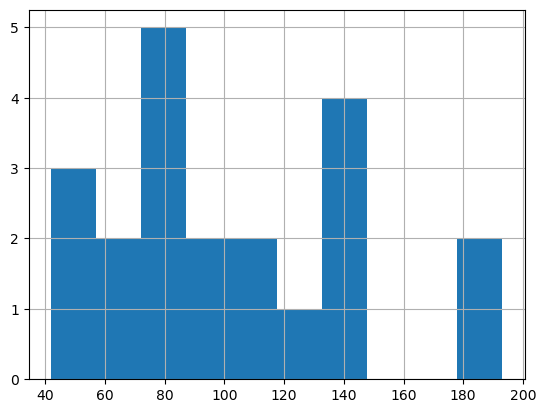

In [42]:
# Distributia datelor de tip text
import matplotlib.pyplot as plt 
fraze["sentences_preprocess"].str.len().hist()
plt.show() # cele mai multe fraze au 80 sau 140 de caractere

[('cryptocurrencie', 10), ('technology', 7), ('transaction', 7), ('financial', 5), ('cryptocurrency', 5), ('blockchain', 5), ('network', 5), ('potential', 4), ('decentralized', 4), ('peer', 4), ('digital', 3), ('use', 3), ('bitcoin', 3), ('secure', 3), ('become', 2), ('future', 2), ('group', 2), ('introduce', 2), ('currency', 2), ('base', 2)]


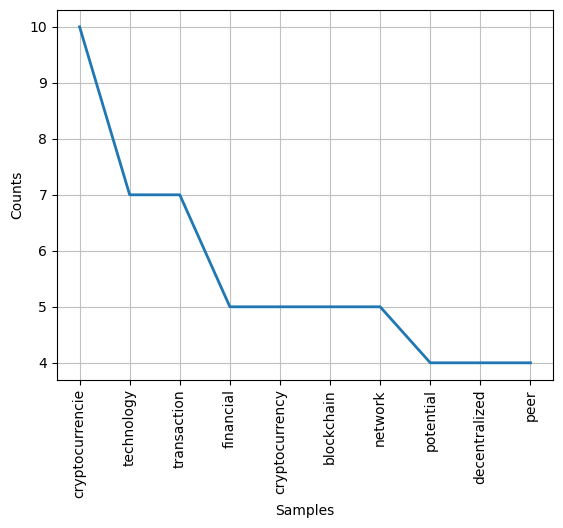

In [47]:
# Grafic pt reprezentarea frecventei de aparitie a cuvintelor
from nltk.probability import FreqDist 
from nltk.tokenize import word_tokenize

text = ' '.join(fraze['sentences_preprocess'].tolist())

tokens = word_tokenize(text.lower())

tokens = [token for token in tokens if token.isalpha()]
freqdist = FreqDist(tokens)
print(freqdist.most_common(20))
freqdist.plot(10)
plt.show() 

[(('blockchain', 'technology'), 4), (('transaction', 'intermediary'), 2), (('intermediary', 'bank'), 2), (('record', 'transaction'), 2), (('peer', 'peer'), 2), (('great', 'financial'), 2), (('cryptocurrencie', 'take'), 1), (('take', 'storm'), 1), (('storm', 'transform'), 1), (('transform', 'way'), 1)]


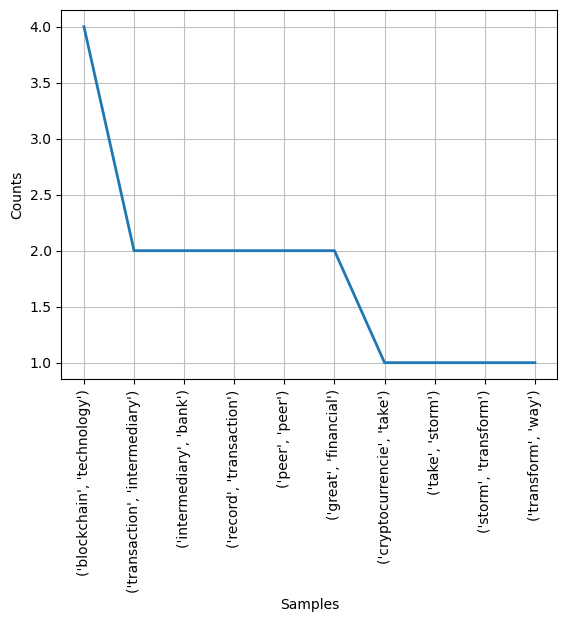

In [48]:
# Analiza N-gramelor
# BIGRAME
from nltk.util import ngrams
text = ' '.join(fraze['sentences_preprocess'].tolist())
tokens = word_tokenize(text.lower())
tokens = [token for token in tokens if token.isalpha()]
bigrams = ngrams(tokens, 2)
freqdist1 = FreqDist(bigrams)
print(freqdist1.most_common(10))
 
freqdist1.plot(10)
plt.show()

[(('transaction', 'intermediary', 'bank'), 2), (('cryptocurrencie', 'storm', 'transform'), 1), (('storm', 'transform', 'money'), 1), (('transform', 'money', 'finance'), 1), (('money', 'finance', 'digital'), 1), (('finance', 'digital', 'asset'), 1), (('digital', 'asset', 'become'), 1), (('asset', 'become', 'hot'), 1), (('become', 'hot', 'topic'), 1), (('hot', 'topic', 'capture'), 1)]


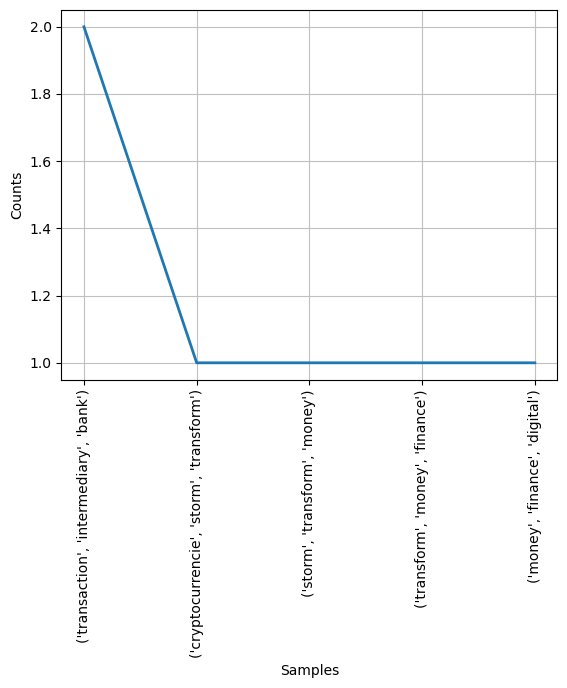

In [51]:
# TRIGRAME
text = ' '.join(fraze['sentences_preprocess'].tolist())
tokens = word_tokenize(text.lower())
tokens = [token for token in tokens if token.isalpha()]

trigrams = ngrams(tokens, 3)
freqdist2 = FreqDist(trigrams)
print(freqdist2.most_common(10)) 

freqdist2.plot(5)
plt.show()

In [50]:
words_to_remove = ['without', 'like', 'think', 'need', 'world', 'way', 'take']
fraze['sentences_preprocess'] = fraze['sentences_preprocess'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_remove)]))

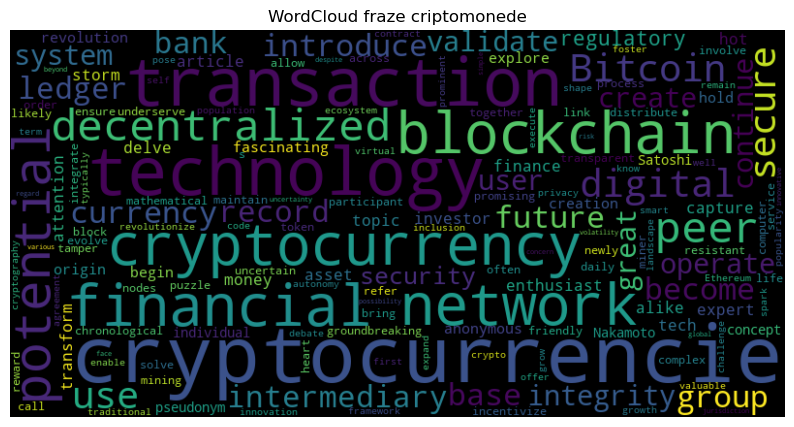

In [52]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(fraze['sentences_preprocess'])
# Word Cloud pentru cuvintele cele mai frecvente
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
# Afișare Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud fraze criptomonede')
plt.show()

In [82]:
# Vectorizarea textului
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(fraze['sentences_preprocess'])




In [65]:
#ignore wornings
import warnings 
  
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
  
# This warning won't display due to the disabled warnings 
warnings.warn('Error: A warning just appeared') 

In [68]:
# K-Means ++
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Definim un interval pentru valorile K
text_data = fraze.shape[0]
K_values = range(2, min(text_data, 11))  


best_K = 2
best_silhouette_score = -1

for K in K_values:
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
    kmeans.fit(X)
    
    
    cluster_assignments = kmeans.labels_
    
    # Calculam scorul silhouette
    silhouette_avg = silhouette_score(X, cluster_assignments)
    
    # Verificam daca K curent are cel mai bun silhouette score
    if silhouette_avg > best_silhouette_score:
        best_K = K
        best_silhouette_score = silhouette_avg

# Initializam K-Means cu cea mai buna valoare K
kmeans = KMeans(n_clusters=best_K, init='k-means++', random_state=0)
kmeans.fit(X)


cluster_assignments = kmeans.labels_
for i, cluster in enumerate(cluster_assignments):
    print(f"Fraza {i} face parte din clusterul {cluster}")

print(f"Cel mai bun numar de clustere (K) este {best_K} cu un scor silhouette de {best_silhouette_score:.2f}")

Fraza 0 face parte din clusterul 3
Fraza 1 face parte din clusterul 8
Fraza 2 face parte din clusterul 3
Fraza 3 face parte din clusterul 6
Fraza 4 face parte din clusterul 0
Fraza 5 face parte din clusterul 1
Fraza 6 face parte din clusterul 7
Fraza 7 face parte din clusterul 2
Fraza 8 face parte din clusterul 5
Fraza 9 face parte din clusterul 6
Fraza 10 face parte din clusterul 1
Fraza 11 face parte din clusterul 2
Fraza 12 face parte din clusterul 3
Fraza 13 face parte din clusterul 1
Fraza 14 face parte din clusterul 7
Fraza 15 face parte din clusterul 0
Fraza 16 face parte din clusterul 6
Fraza 17 face parte din clusterul 4
Fraza 18 face parte din clusterul 1
Fraza 19 face parte din clusterul 9
Fraza 20 face parte din clusterul 4
Cel mai bun numar de clustere (K) este 10 cu un scor silhouette de 0.03


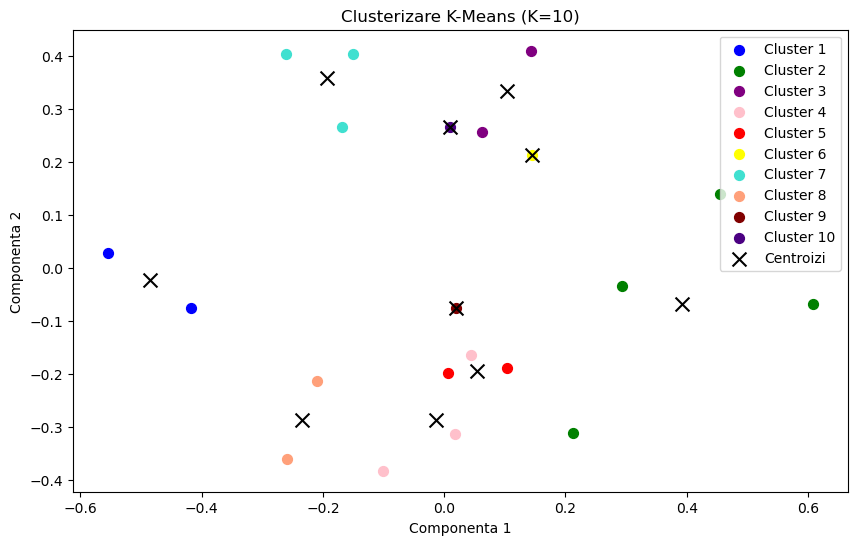

In [71]:
# Reducerea dimensionalitatii cu PCA to pentru a vizualiza clusterele 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Create a scatter plot for each data point and color by cluster assignment
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'purple', 'pink', 'red', 'yellow', 'turquoise', 'lightsalmon', 'maroon', 'indigo']
for i in range(K):
    plt.scatter(X_pca[cluster_assignments == i, 0], X_pca[cluster_assignments == i, 1], s=50, c=colors[i], label=f'Cluster {i + 1}')

# Mark the cluster centers with black 'x' markers
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='k', marker='x', label='Centroizi')

plt.title(f'Clusterizare K-Means (K={K})')
plt.xlabel('Componenta 1')
plt.ylabel('Componenta 2')
plt.legend()
plt.show()

In [73]:
## Predictii
# Adaugarea coloanei 'cluster' care indica din ce cluster face parte fraza
cluster_assignments = kmeans.labels_
a=[]
for i, cluster in enumerate(cluster_assignments):
    a.append(str(cluster))


fraze["cluster"]=pd.DataFrame(a)
fraze

,sentences,sentences_preprocess,cluster
0,Cryptocurrencies have taken the world by storm...,cryptocurrencie storm transform money finance,3
1,"These digital assets have become a hot topic, ...",digital asset become hot topic capture attenti...,8
2,"In this article, we will delve into the fascin...",article delve fascinating cryptocurrencie expl...,3
3,The cryptocurrency revolution began with the c...,cryptocurrency revolution begin creation Bitco...,6
4,Bitcoin introduced the concept of a decentrali...,Bitcoin introduce concept decentralized digita...,0
5,This technology allows for secure and transpar...,technology allow secure transparent transactio...,1
6,At the heart of cryptocurrencies is blockchain...,heart cryptocurrencie blockchain technology,7
7,A blockchain is a distributed ledger that reco...,blockchain distribute ledger record transactio...,2
8,"These transactions are grouped into ""blocks"" a...",transaction group block link together chronolo...,5
9,This decentralized and tamper-resistant ledger...,decentralized tamper resistant ledger ensure i...,6


In [78]:
test_data=['GDP growth rate in major economies influences cryptocurrency markets', 
           'as traders assess the overall health of the global economy',
           'blockchain technology, the backbone of most cryptocurrencies',
           'economists debate the potential implications for monetary policy financial stability',
           'the recent market volatility has led investors to diversify their portfolios',
          'Cryptocurrency regulations are evolving globally',
          'governments working to strike a balance between fostering innovation and addressing concerns related to money laundering',
          '"bitcoin the pioneering cryptocurrency experienced a surge in value as investors ']

# Step 3: Preprocess and vectorize the test data
test_tfidf_matrix = vectorizer.transform(test_data)

# Step 4: Make predictions on the test data
test_predictions = kmeans.predict(test_tfidf_matrix)

# Print the predicted cluster assignments
print("Predicted cluster assignments for test data:")
for i, cluster in enumerate(test_predictions):
    print(f"Text '{test_data[i]}' belongs to Cluster {cluster}")

Predicted cluster assignments for test data:
Text 'GDP growth rate in major economies influences cryptocurrency markets' belongs to Cluster 6
Text 'as traders assess the overall health of the global economy' belongs to Cluster 4
Text 'blockchain technology, the backbone of most cryptocurrencies' belongs to Cluster 7
Text 'economists debate the potential implications for monetary policy financial stability' belongs to Cluster 4
Text 'the recent market volatility has led investors to diversify their portfolios' belongs to Cluster 4
Text 'Cryptocurrency regulations are evolving globally' belongs to Cluster 6
Text 'governments working to strike a balance between fostering innovation and addressing concerns related to money laundering' belongs to Cluster 3
Text '"bitcoin the pioneering cryptocurrency experienced a surge in value as investors ' belongs to Cluster 6


In [80]:
# Coeficientul silhouette pentru evaluarea predictiei
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(test_tfidf_matrix, test_predictions)
print(f"Scorul silhouette: {silhouette_avg}") # 11.8%

Scorul silhouette: 0.1181632096989824
